# **Madrid Población por distrito**
### Todos los datos desde el 2018 hasta 2024

---
## **Importamos** las librerías y el dataset de la Comunidad de Madrid

In [2]:
import pandas as pd

poblacion = pd.read_csv("C:/Users/34666/Documents/MASTER EN IA/THE BRIDGE/REPO_CLASE/REPO_PRACTICE/EDA/RESTAURANTS/data/Poblacion_Madrid.csv", sep=";")

poblacion.head()

fecha  cod_municipio municipio cod_distrito     distrito  \
0  1 de enero de 2024          28079    Madrid            1       Centro   
1  1 de enero de 2024          28079    Madrid            2   Arganzuela   
2  1 de enero de 2024          28079    Madrid            3       Retiro   
3  1 de enero de 2024          28079    Madrid            4    Salamanca   
4  1 de enero de 2024          28079    Madrid            5    Chamartín   

  cod_barrio       barrio num_personas num_personas_hombres  \
0          1       Centro      145.411               73.734   
1          2   Arganzuela      156.559               73.311   
2          3       Retiro      119.757               54.339   
3          4    Salamanca      149.778               66.374   
4          5    Chamartín      148.111               66.860   

  num_personas_mujeres  
0               71.677  
1               83.248  
2               65.418  
3               83.404  
4               81.251

---
## **Limpiamos** el dataset.
#### Nos quedamos con los distritos y la cantidad de personas.

In [3]:
# Hacemos una copia.
pob = poblacion.copy()

# Limpiamos cod_distrito.
pob = pob[pob['cod_distrito'] != 'Todos']
pob['cod_distrito'] = pob['cod_distrito'].astype(int)

# Formatear fecha para quedarnos solo con el año.
pob['fecha'] = pob['fecha'].str.replace('1 de enero de ', '')

# Pasar a int las columnas de numeros.
pob['fecha']        = pob['fecha'].astype(str).str.replace('.', '').astype(int)
pob['num_personas'] = pob['num_personas'].astype(str).str.replace('.', '').astype(int)
pob['cod_distrito'] = pob['cod_distrito'].astype(str).str.replace('.', '').astype(int)

# Limpiamos la columna de distrito que tiene un espacio al final.
pob['distrito'] = pob['distrito'].str.strip()

# El df indica tanto el sum por distrito como el valor individual por barrios.
# Nos quedamos solo con el valor sumado por distrito.
# Agrupar y obtener índice de la fila con máximo valor en cada grupo.
valor_pob_distrito = pob.groupby(['fecha', 'cod_distrito'])['num_personas'].idxmax()

# Filtrar el DataFrame original usando esos índices.
pob_filtered = pob.loc[valor_pob_distrito, ['fecha', 'cod_distrito', 'distrito', 'num_personas']]
pob_filtered_sorted = pob_filtered.sort_values(by=["fecha", "cod_distrito"], ascending=[True, True]).reset_index().drop(columns="index")
pob_filtered_sorted

fecha  cod_distrito             distrito  num_personas
0     2018             1               Centro        132352
1     2018             2           Arganzuela        152907
2     2018             3               Retiro        119011
3     2018             4            Salamanca        145268
4     2018             5            Chamartín        144894
..     ...           ...                  ...           ...
142   2024            17           Villaverde        167952
143   2024            18    Villa de Vallecas        122337
144   2024            19            Vicálvaro         89772
145   2024            20  San Blas-Canillejas        166583
146   2024            21              Barajas         49612

[147 rows x 4 columns]

---
## **Importamos** las coordenadas de los distritos de Madrid

In [3]:
# Longitud y Latitud de los distritos de Madrid.
distritos_coords = pd.DataFrame([
    {'cod_distrito': 1, 'distrito': 'Centro',       'latitud': 40.4165, 'longitud': -3.7039},
    {'cod_distrito': 2, 'distrito': 'Arganzuela',   'latitud': 40.3989, 'longitud': -3.6975},
    {'cod_distrito': 3, 'distrito': 'Retiro',       'latitud': 40.4110, 'longitud': -3.6767},
    {'cod_distrito': 4, 'distrito': 'Salamanca',    'latitud': 40.4297, 'longitud': -3.6780},
    {'cod_distrito': 5, 'distrito': 'Chamartín',    'latitud': 40.4518, 'longitud': -3.6781},
    {'cod_distrito': 6, 'distrito': 'Tetuán',       'latitud': 40.4582, 'longitud': -3.7033},
    {'cod_distrito': 7, 'distrito': 'Chamberí',     'latitud': 40.4336, 'longitud': -3.7037},
    {'cod_distrito': 8, 'distrito': 'Fuencarral-El Pardo', 'latitud': 40.5021, 'longitud': -3.7084},
    {'cod_distrito': 9, 'distrito': 'Moncloa-Aravaca','latitud': 40.4381, 'longitud': -3.7280},
    {'cod_distrito':10, 'distrito': 'Latina',        'latitud': 40.3967, 'longitud': -3.7450},
    {'cod_distrito':11, 'distrito': 'Carabanchel',   'latitud': 40.3823, 'longitud': -3.7409},
    {'cod_distrito':12, 'distrito': 'Usera',         'latitud': 40.3810, 'longitud': -3.7072},
    {'cod_distrito':13, 'distrito': 'Puente de Vallecas','latitud': 40.3851, 'longitud': -3.6622},
    {'cod_distrito':14, 'distrito': 'Moratalaz',     'latitud': 40.4076, 'longitud': -3.6454},
    {'cod_distrito':15, 'distrito': 'Ciudad Lineal', 'latitud': 40.4455, 'longitud': -3.6517},
    {'cod_distrito':16, 'distrito': 'Hortaleza',     'latitud': 40.4746, 'longitud': -3.6457},
    {'cod_distrito':17, 'distrito': 'Villaverde',    'latitud': 40.3401, 'longitud': -3.6921},
    {'cod_distrito':18, 'distrito': 'Villa de Vallecas','latitud': 40.3754, 'longitud': -3.6279},
    {'cod_distrito':19, 'distrito': 'Vicálvaro',     'latitud': 40.4008, 'longitud': -3.6010},
    {'cod_distrito':20, 'distrito': 'San Blas-Canillejas','latitud': 40.4397, 'longitud': -3.6156},
    {'cod_distrito':21, 'distrito': 'Barajas',       'latitud': 40.4719, 'longitud': -3.5795}
])

In [5]:
puntos = {
    # Usamos el nombre del distrito en minúsculas y con espacios reemplazados por guiones bajos
    row['distrito'].lower().replace(' ', '_'): (row['latitud'], row['longitud'])
    for _, row in distritos_coords.iterrows()
}
puntos

{'centro': (40.4165, -3.7039),
 'arganzuela': (40.3989, -3.6975),
 'retiro': (40.411, -3.6767),
 'salamanca': (40.4297, -3.678),
 'chamartín': (40.4518, -3.6781),
 'tetuán': (40.4582, -3.7033),
 'chamberí': (40.4336, -3.7037),
 'fuencarral-el_pardo': (40.5021, -3.7084),
 'moncloa-aravaca': (40.4381, -3.728),
 'latina': (40.3967, -3.745),
 'carabanchel': (40.3823, -3.7409),
 'usera': (40.381, -3.7072),
 'puente_de_vallecas': (40.3851, -3.6622),
 'moratalaz': (40.4076, -3.6454),
 'ciudad_lineal': (40.4455, -3.6517),
 'hortaleza': (40.4746, -3.6457),
 'villaverde': (40.3401, -3.6921),
 'villa_de_vallecas': (40.3754, -3.6279),
 'vicálvaro': (40.4008, -3.601),
 'san_blas-canillejas': (40.4397, -3.6156),
 'barajas': (40.4719, -3.5795)}

---
## **Convertimos** a GeoDataFrame

#### Creamos el GeoDataFrame.

In [5]:
# Convertimos este df en un geo df para poder tener puntos de geolocalización que nos vendrá bien para los mapas.
import geopandas as gpd
from shapely.geometry import Point

distritos_coords["geometry"] = distritos_coords.apply(lambda r: Point(r['longitud'], r['latitud']), axis=1)
gdf_distritos = gpd.GeoDataFrame(distritos_coords, geometry='geometry', crs='EPSG:4326')

# Reproyecta ambos GeoDataFrames a un CRS en metros
# gdf_distritos = gdf_distritos.to_crs(epsg=25830) # distritos
distritos = gdf_distritos.drop(["latitud", "longitud"], axis=1)


print(distritos.crs)
print(distritos.info())
distritos.head(2)

EPSG:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  21 non-null     int64   
 1   distrito      21 non-null     object  
 2   geometry      21 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 636.0+ bytes
None


cod_distrito    distrito                 geometry
0             1      Centro  POINT (-3.7039 40.4165)
1             2  Arganzuela  POINT (-3.6975 40.3989)

#### Convertimos a GDF en metros.

In [6]:
# Conviertimos a web mercator.
distritos_wm = distritos.to_crs(epsg=3857)

# Conviertimos a metros.
distritos_metros = distritos.to_crs(epsg=25830)

---
## **Unimos** las coordenadas de los distritos a nuestra df.

In [7]:
# Hacer el merge después de limpiar
pob_district = pob_filtered_sorted.merge(distritos_wm, on=['cod_distrito', 'distrito'], how='left')

print(pob_district.info())
pob_district.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fecha         147 non-null    int64   
 1   cod_distrito  147 non-null    int64   
 2   distrito      147 non-null    object  
 3   num_personas  147 non-null    int64   
 4   geometry      147 non-null    geometry
dtypes: geometry(1), int64(3), object(1)
memory usage: 5.9+ KB
None


fecha  cod_distrito    distrito  num_personas  \
0   2018             1      Centro        132352   
1   2018             2  Arganzuela        152907   

                          geometry  
0  POINT (-412316.262 4926652.806)  
1  POINT (-411603.817 4924079.794)

---
## **Convertimos** a GeoDataFrame

In [19]:
gdf_pob_district = gpd.GeoDataFrame(pob_district, geometry='geometry', crs='EPSG:3857')

gdf_pob_district = gdf_pob_district.sort_values(by=["fecha","num_personas"], ascending=[False, False])

print(gdf_pob_district.crs)
print(gdf_pob_district.info())
gdf_pob_district.head(21)

EPSG:3857
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 147 entries, 136 to 20
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fecha         147 non-null    int64   
 1   cod_distrito  147 non-null    int64   
 2   distrito      147 non-null    object  
 3   num_personas  147 non-null    int64   
 4   geometry      147 non-null    geometry
dtypes: geometry(1), int64(3), object(1)
memory usage: 6.9+ KB
None


fecha  cod_distrito             distrito  num_personas  \
136   2024            11          Carabanchel        274406   
133   2024             8  Fuencarral-El Pardo        253898   
138   2024            13   Puente de Vallecas        253048   
135   2024            10               Latina        250396   
140   2024            15        Ciudad Lineal        230035   
141   2024            16            Hortaleza        205182   
142   2024            17           Villaverde        167952   
145   2024            20  San Blas-Canillejas        166583   
131   2024             6               Tetuán        166211   
127   2024             2           Arganzuela        156559   
129   2024             4            Salamanca        149778   
137   2024            12                Usera        149113   
130   2024             5            Chamartín        148111   
126   2024             1               Centro        145411   
132   2024             7             Chamberí        141984   
134   2024             9      Moncloa-Aravaca        125223   
143   2024            18    Villa de Vallecas        122337   
128   2024             3               Retiro        119757   
139   2024            14            Moratalaz         95123   
144   2024            19            Vicálvaro         89772   
146   2024            21              Barajas         49612   

                            geometry  
136  POINT (-416435.083 4921653.592)  
133     POINT (-412817.2 4939176.61)  
138  POINT (-407674.239 4922062.789)  
135  POINT (-416891.493 4923758.214)  
140  POINT (-406505.385 4930893.896)  
141  POINT (-405837.468 4935151.451)  
142  POINT (-411002.692 4915488.468)  
145  POINT (-402486.751 4930045.532)  
131   POINT (-412249.47 4932751.778)  
127  POINT (-411603.817 4924079.794)  
129  POINT (-409433.087 4928583.006)  
137  POINT (-412683.616 4921463.613)  
130  POINT (-409444.219 4931815.479)  
126  POINT (-412316.262 4926652.806)  
132  POINT (-412293.998 4929153.365)  
134  POINT (-414999.062 4929811.513)  
143  POINT (-403855.981 4920645.286)  
128  POINT (-409288.372 4925848.667)  
139  POINT (-405804.072 4925351.596)  
144   POINT (-400861.486 4924357.53)  
146  POINT (-398468.117 4934756.343)

---
## **GRÁFICOS**

### **Pintamos** el gráfico "Población por distrito".

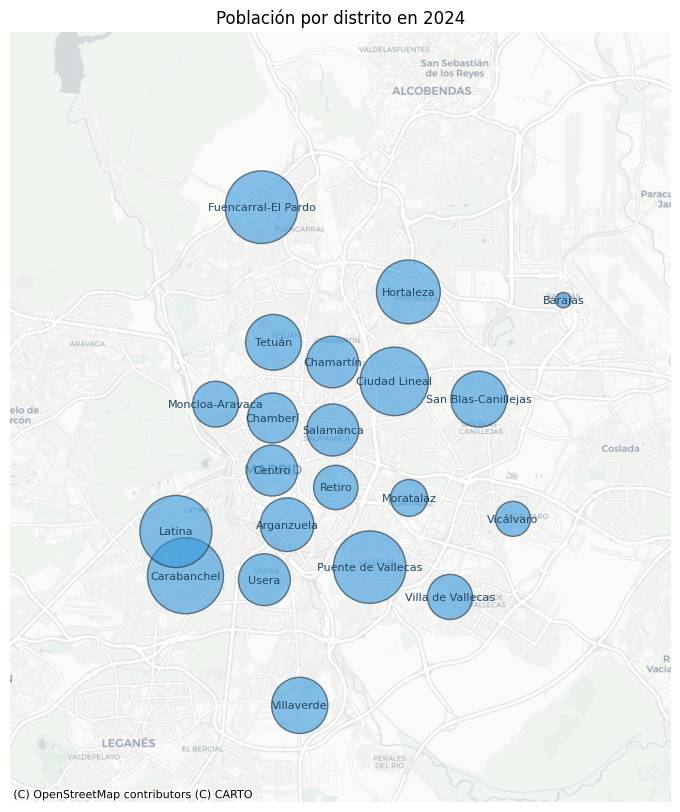

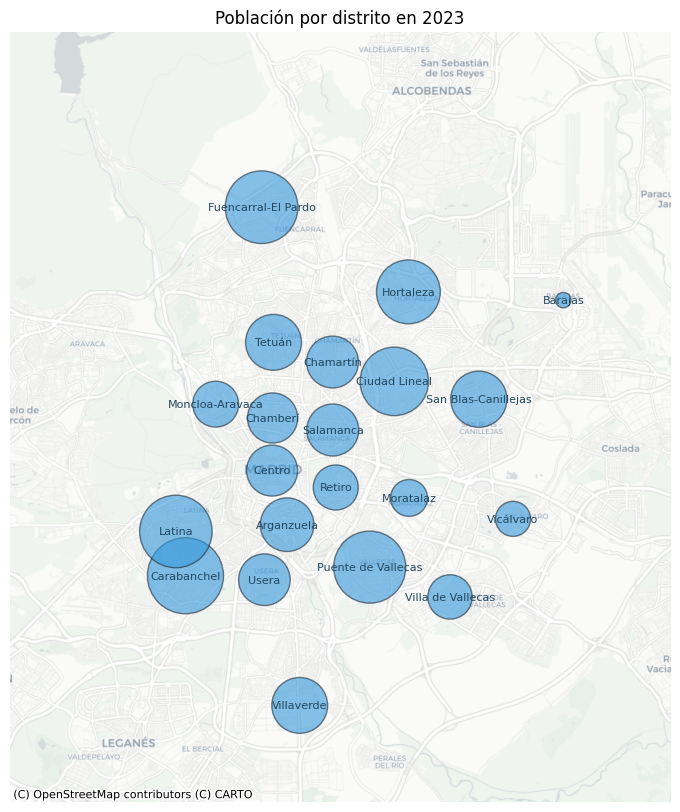

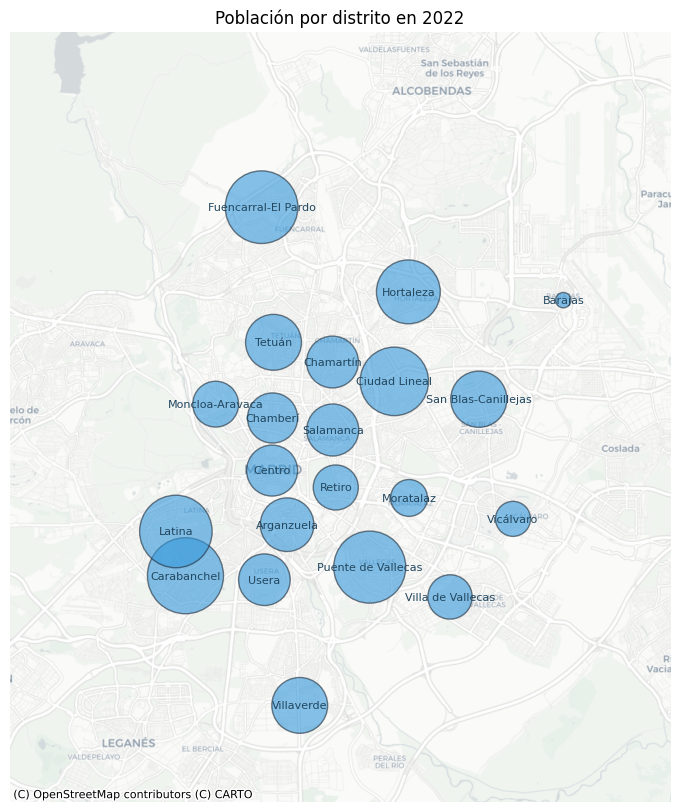

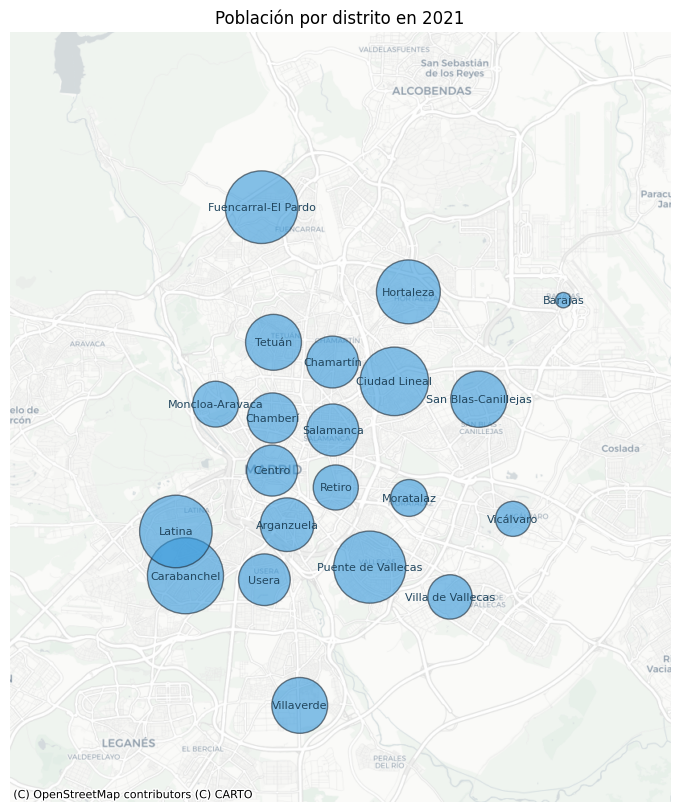

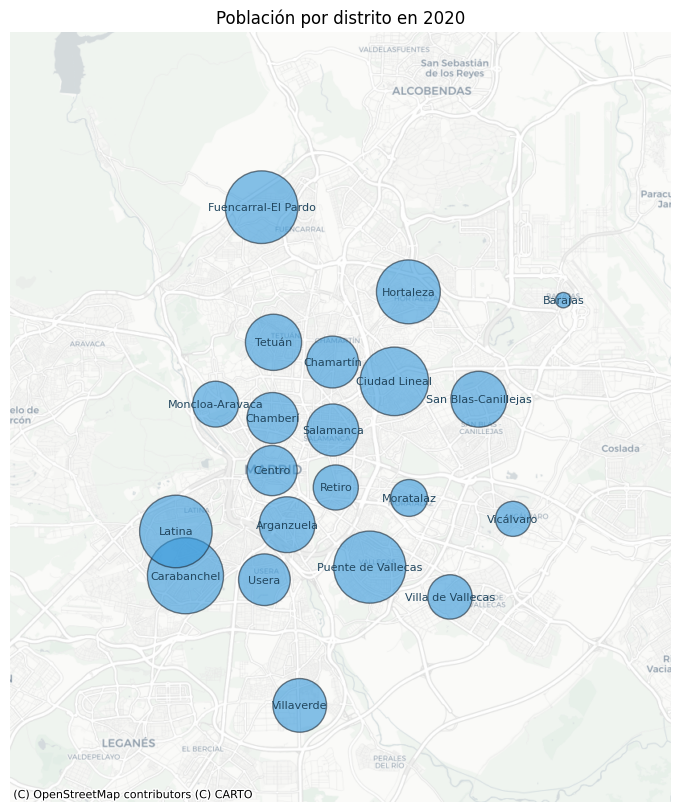

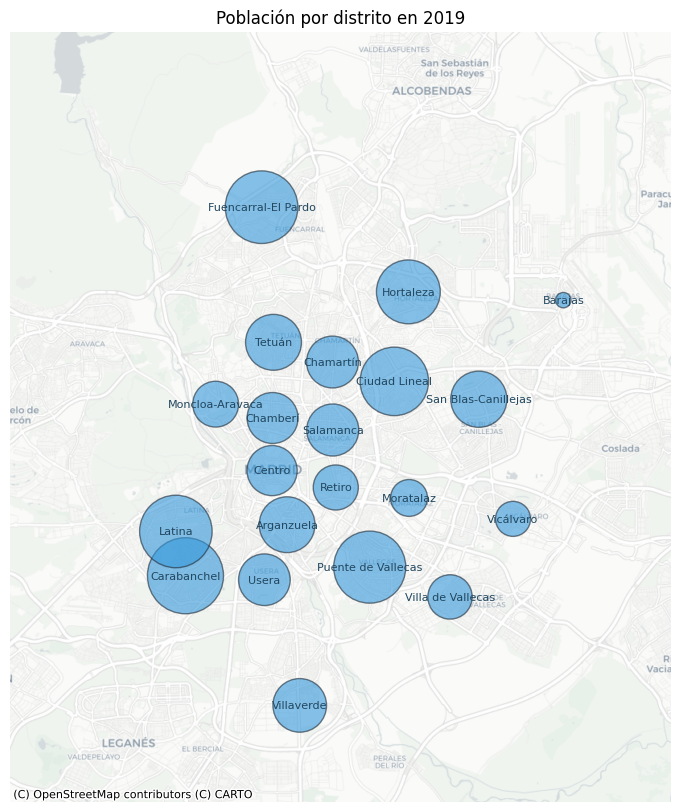

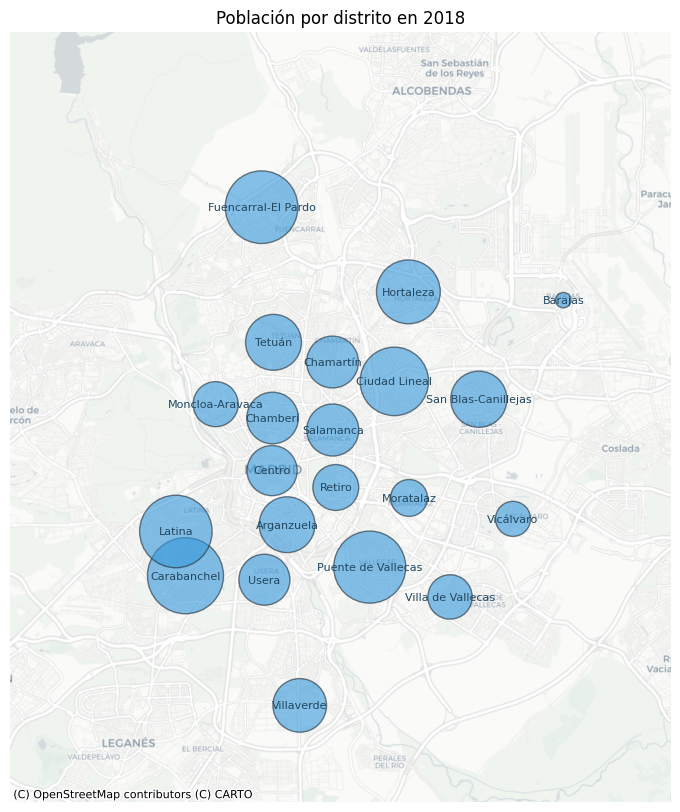

In [9]:
import contextily as ctx
import matplotlib.pyplot as plt

# Escalar los valores de "renta" entre 10 y 100
tamaño_min = 100
tamaño_max = 3000

renta = gdf_pob_district["num_personas"]
norm = (renta - renta.min()) / (renta.max() - renta.min())
gdf_pob_district["tamaño"] = tamaño_min + norm * (tamaño_max - tamaño_min)

# 1. Obtener lista de años únicos
for year in gdf_pob_district["fecha"].unique():

    # 2. Filtrar por año
    gdf_year = gdf_pob_district[gdf_pob_district["fecha"] == year]

    # 3. Hacer el plot con ese subset
    ax = gdf_year.plot(figsize=(10, 10),
                       alpha=0.6,
                       edgecolor="#1f2a35", linewidth=1,
                       color='#3498db',
                       markersize=gdf_pob_district["tamaño"])

    # 4. Añadir texto de distritos
    for x, y, label in zip(gdf_year.geometry.x,
                           gdf_year.geometry.y,
                           gdf_year["distrito"]):
        ax.text(x, y, label, fontsize=8, ha='center', va='center', color="#22475f")
    
    # Coordenadas para ver toda la ciudad de Madrid con un poco más de margen
    ax.set_xlim([-424778.23404063, -393382.69786466])
    ax.set_ylim([4910895.19804772, 4947506.19846259])

    # 5. Añadir el mapa base
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

    # 6. Ajustes del gráfico
    plt.axis('off')
    plt.title(f"Población por distrito en {year}")

    # 7. Guardar imagen
    plt.savefig(f"img/export_by_vsc/Madrid_población_{year}.png", dpi=150, bbox_inches='tight')
    plt.show()


### **Pintamos** el gráfico de barras "Población por distrito".

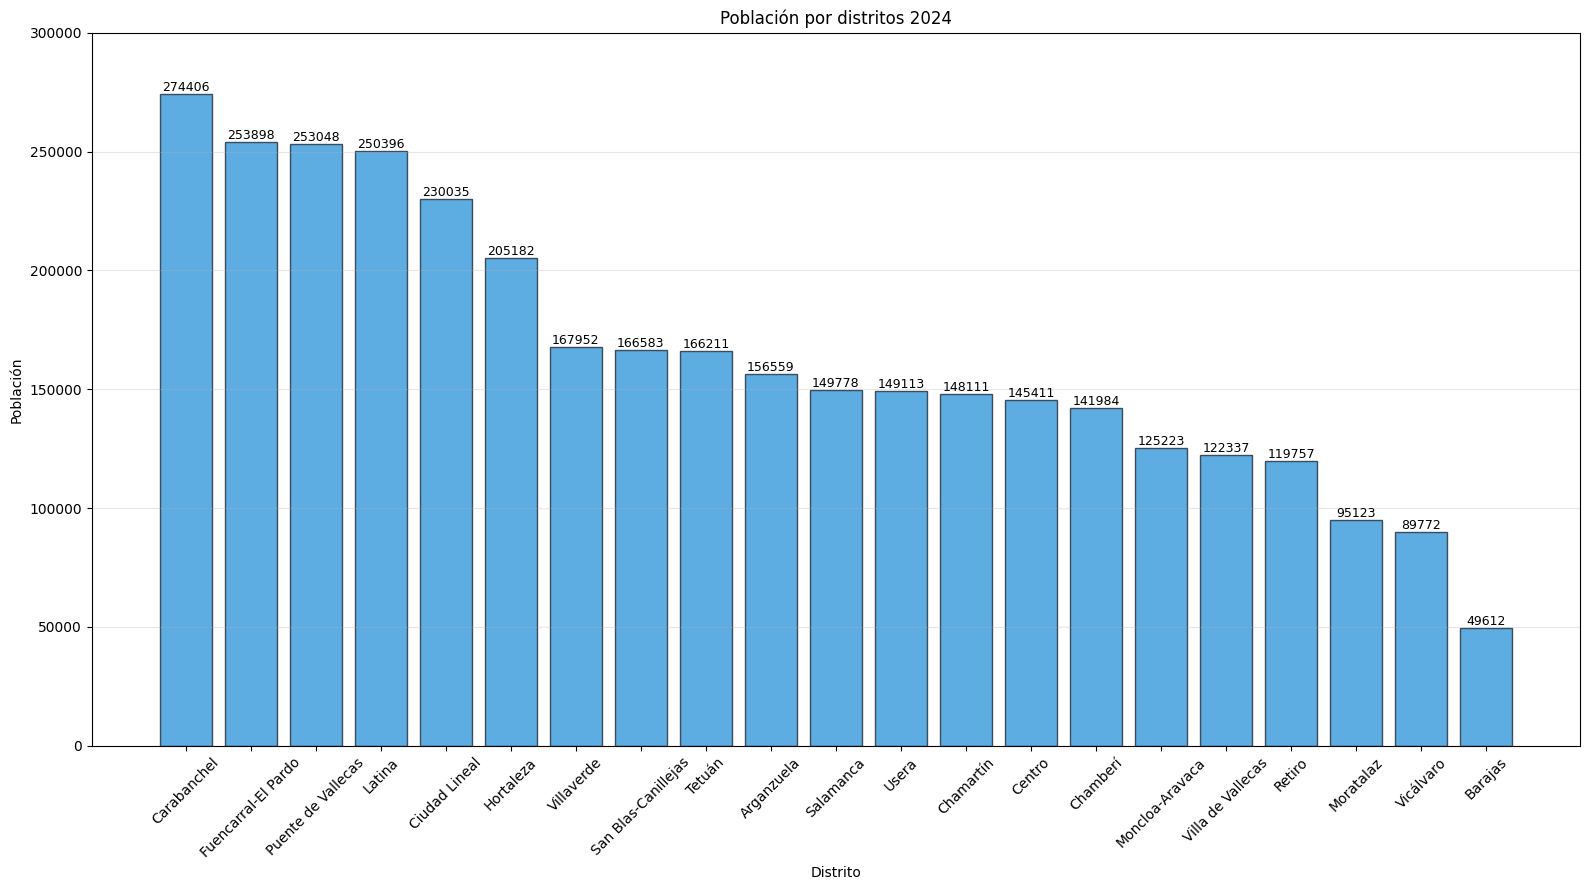

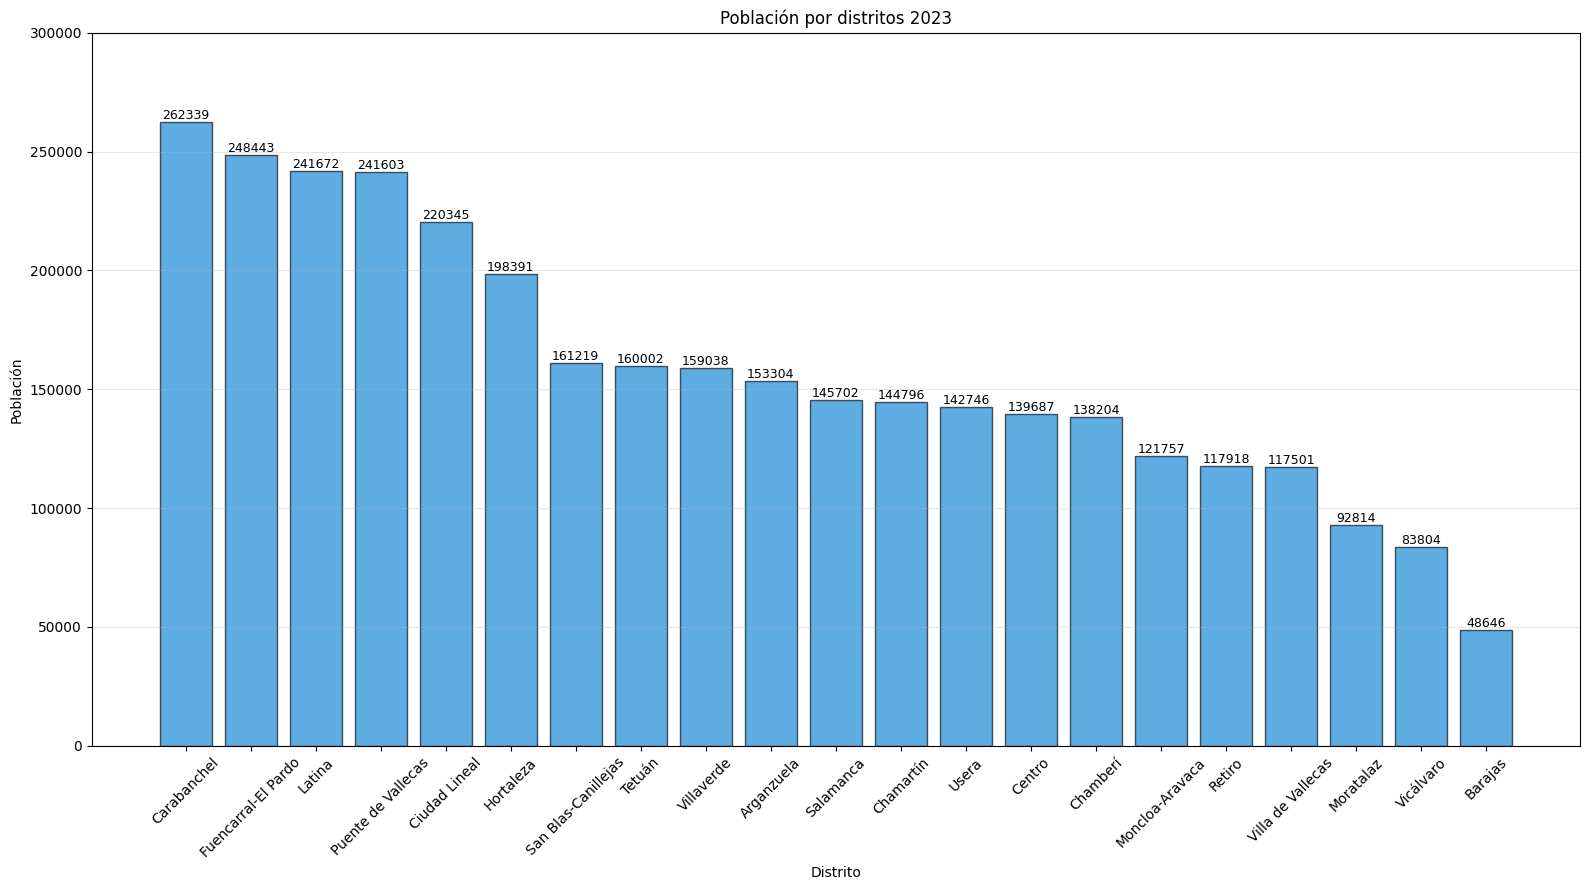

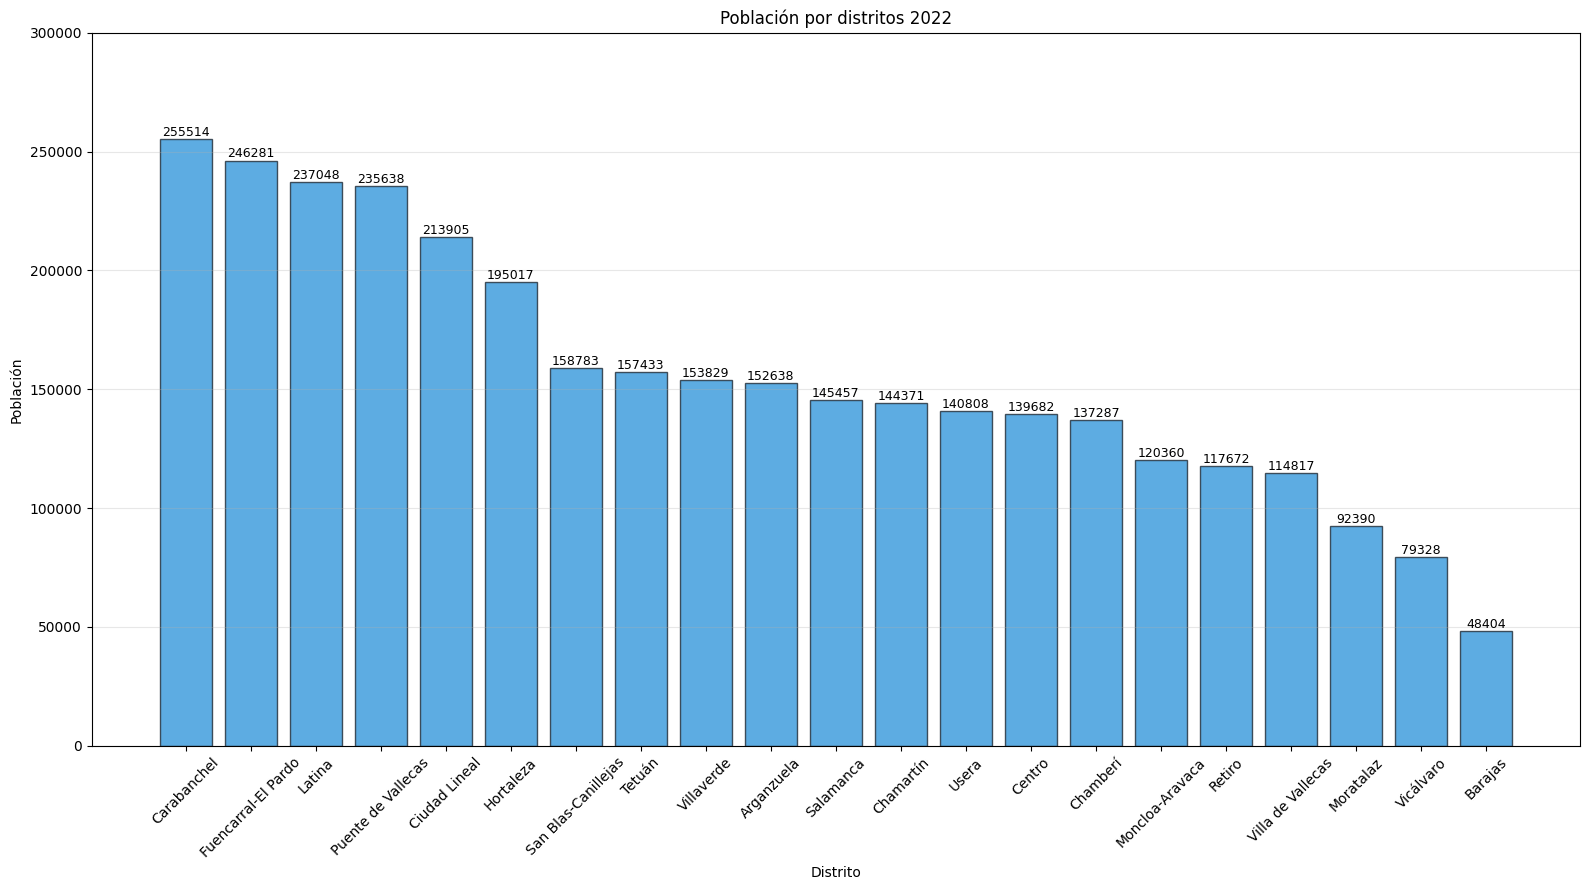

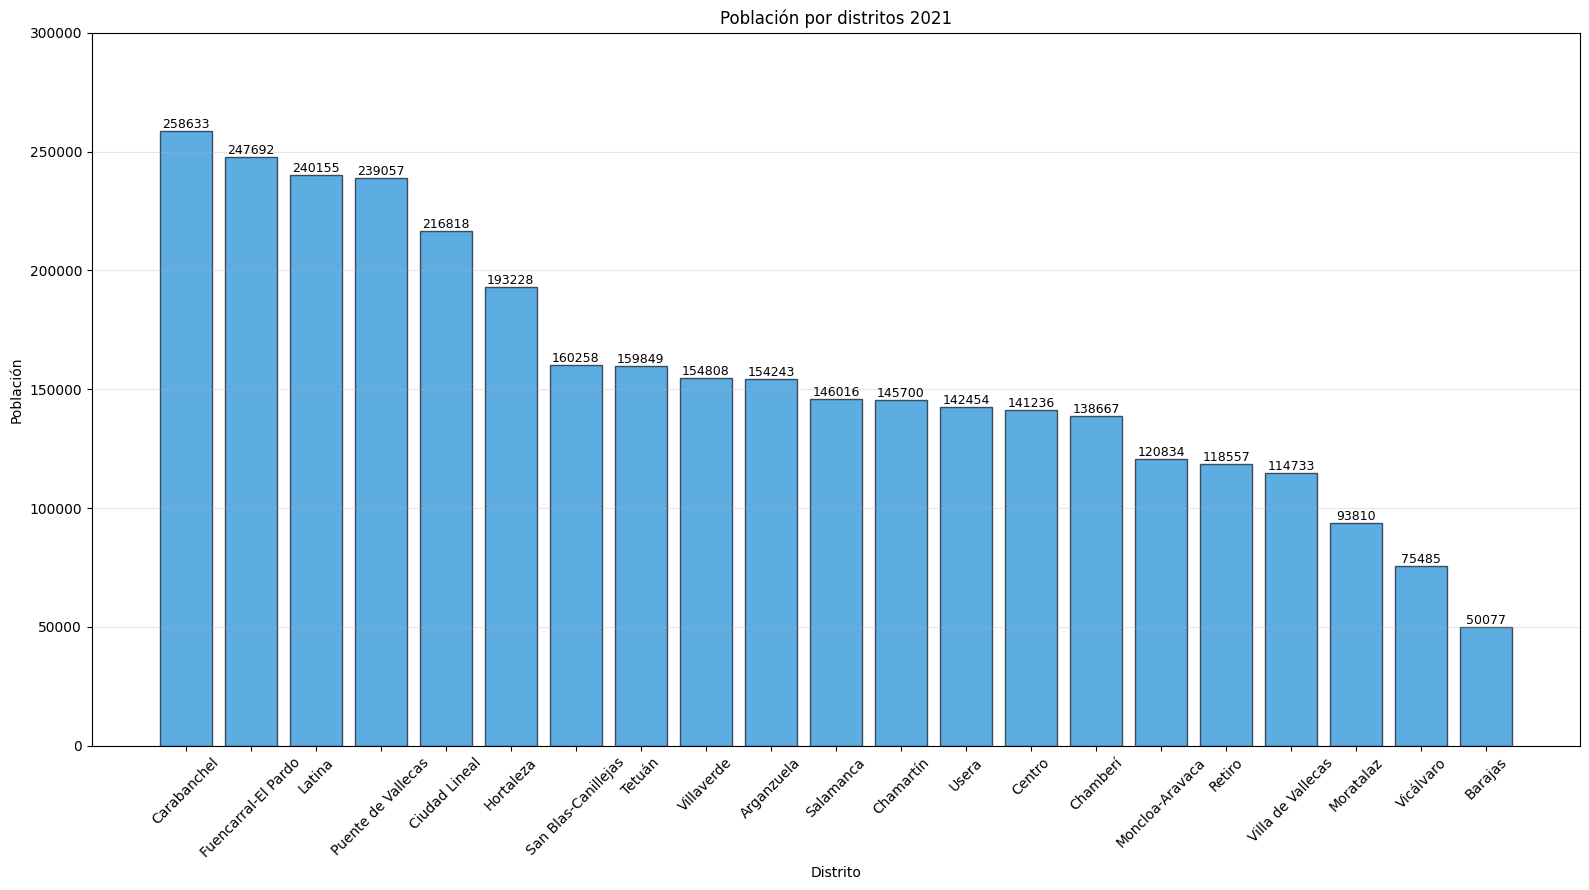

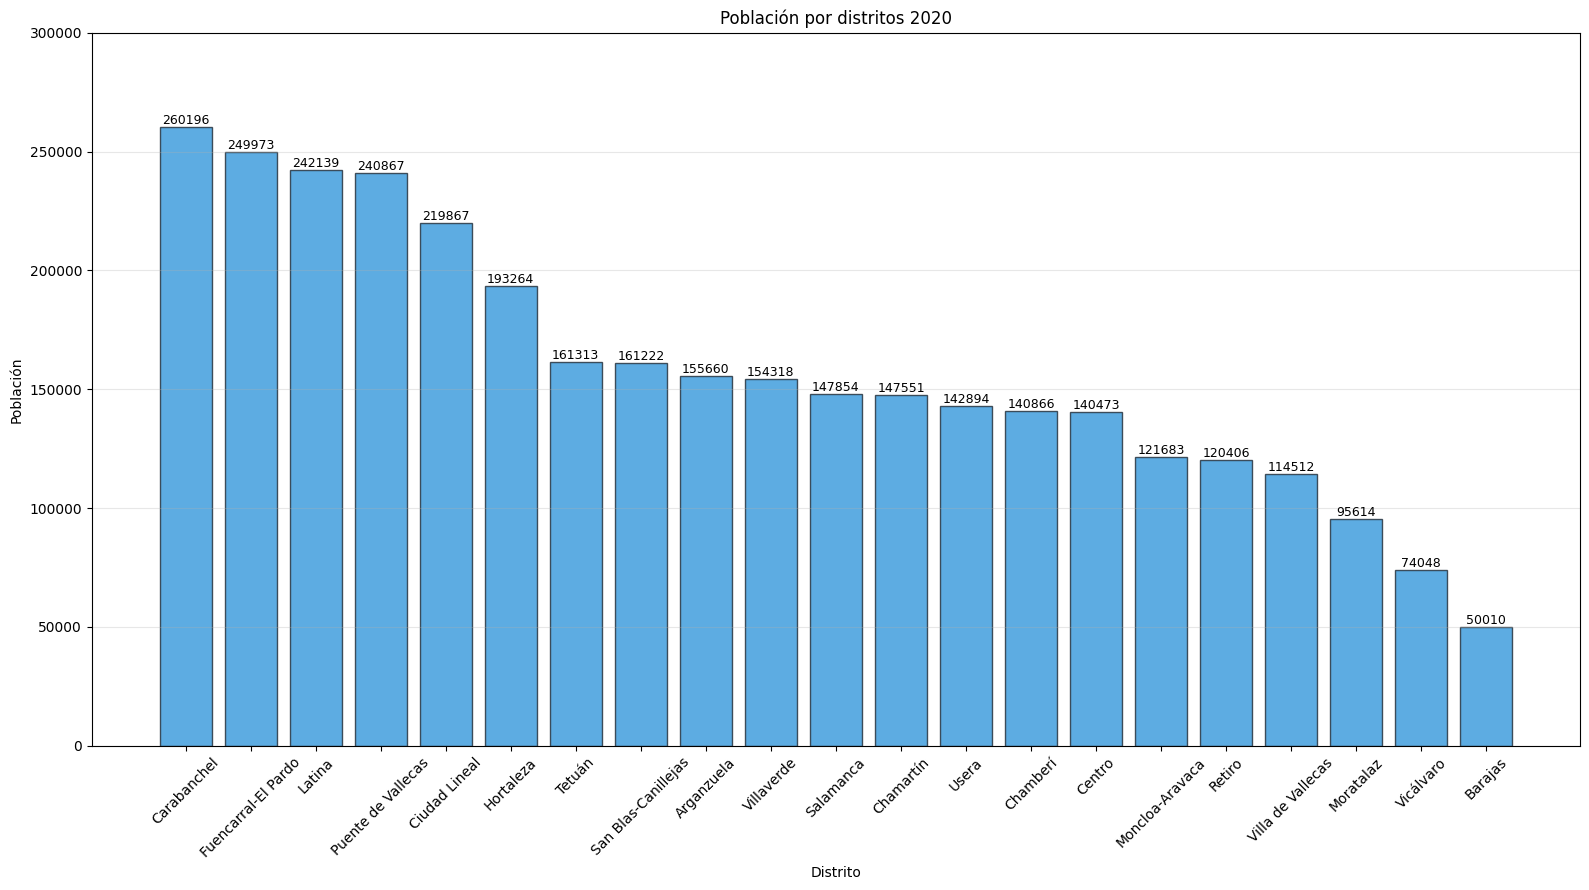

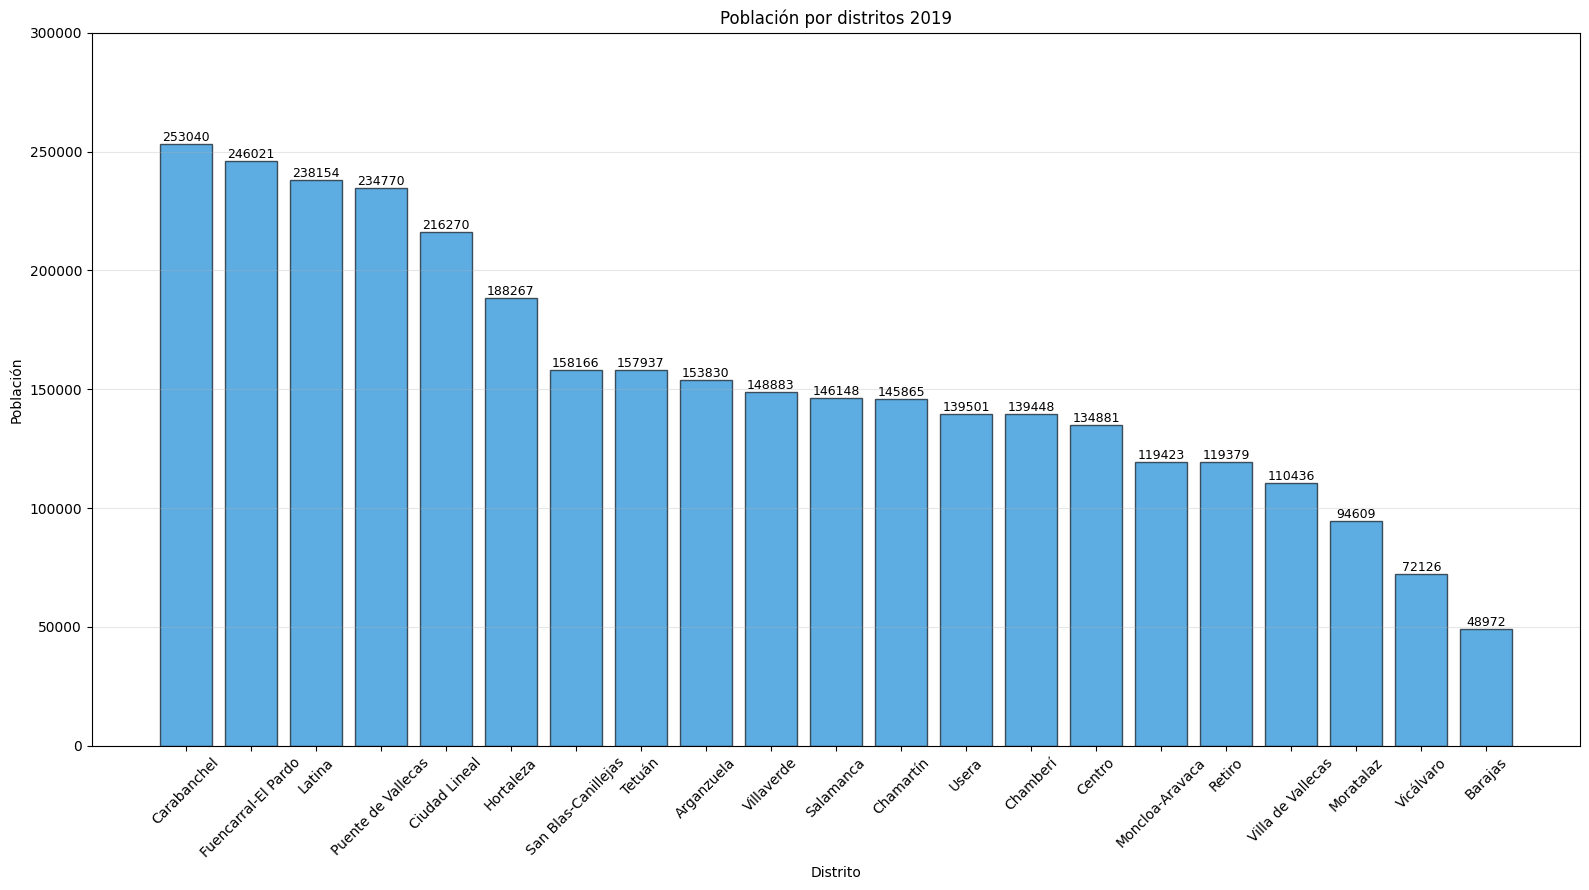

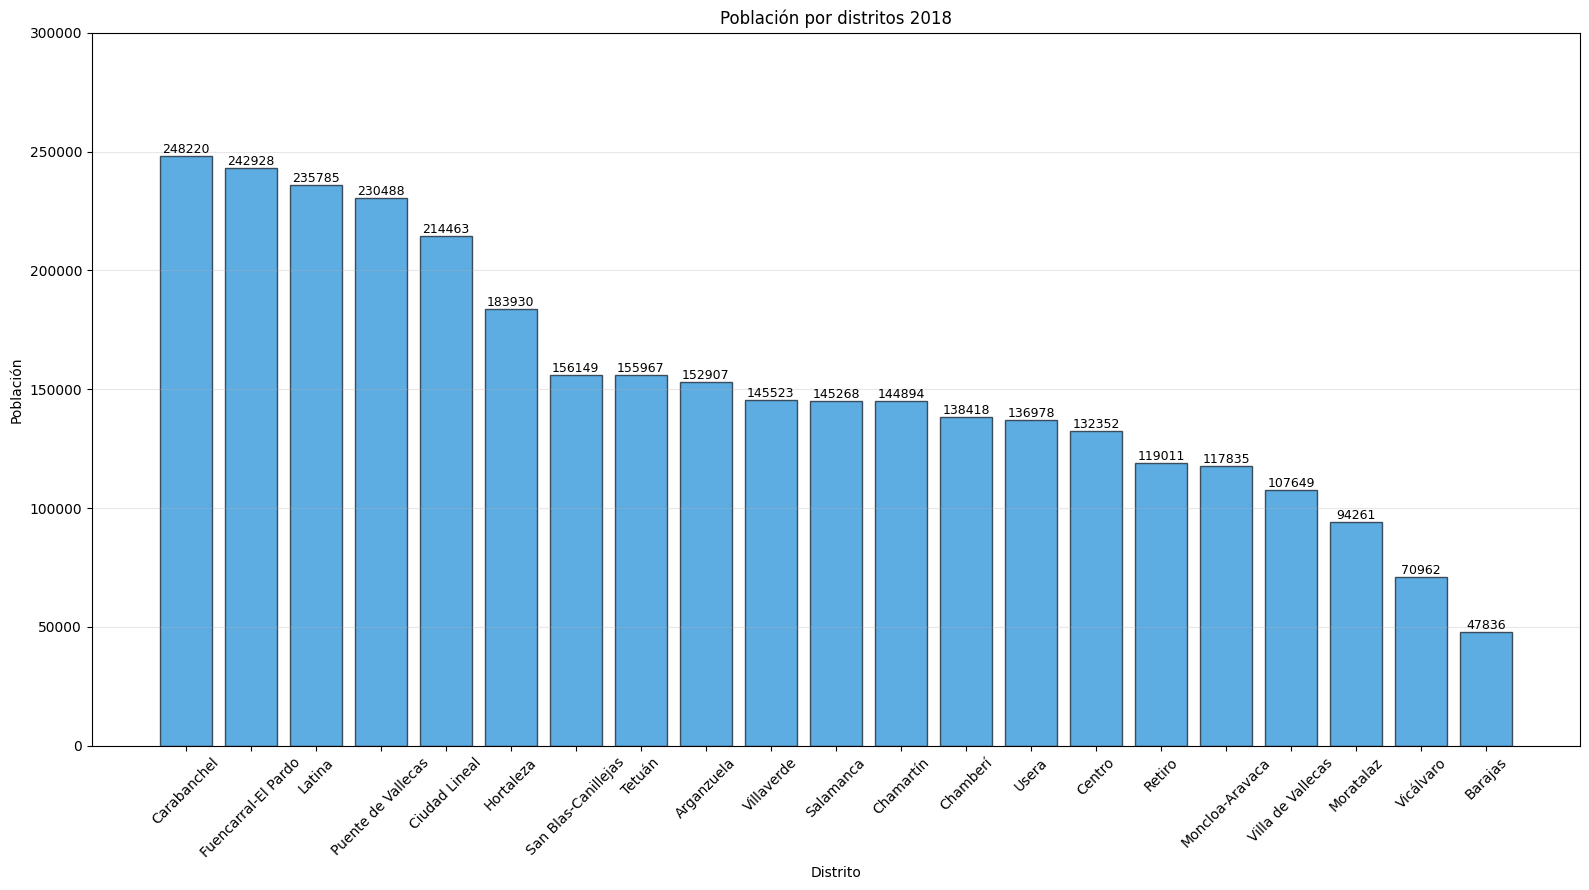

In [10]:
# 1. Obtener lista de años únicos
for year in gdf_pob_district["fecha"].unique():

    # 2. Filtrar por año
    gdf_year = gdf_pob_district[gdf_pob_district["fecha"] == year]

    # Crear gráfico
    plt.figure(figsize=(16, 9))  # Tamaño del gráfico (ancho, alto) en pulgadas

    plt.bar(gdf_year["distrito"], # Eje X: etiquetas de las categorías
        gdf_year["num_personas"], # Eje Y: altura de cada barra
        color='#3498db',                # Color de las barras
        edgecolor="#1f2a35",            # Color del borde de las barras
        linewidth=1,                      # Grosor del borde
        alpha=0.8)                        # Transparencia (1.0 = opaco, 0 = invisible)

    # Añadir etiquetas
    plt.title(f"Población por distritos {year}") # Título general
    plt.xlabel("Distrito")               # Texto del eje X
    plt.ylabel("Población")              # Texto del eje Y

    # Mostrar valores encima de las barras
    for i, valor in enumerate(gdf_year["num_personas"]):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9)

    # Rotamos las etiquetas del eje X
    plt.xticks(rotation=45)

    # Modificamos la escala en Y
    plt.ylim(0, 300000)

    # Activamos fondo de rejilla
    plt.grid(axis='y', linestyle='-', alpha=0.3)

    # Ajustar espacio y mostrar
    plt.tight_layout()

    # Guardar imagen del gráfico.
    plt.savefig(f"img/export_by_vsc/Madrid_poblacion_por_distrito_barras_{year}.png", dpi=150, bbox_inches='tight')

    plt.show()


## **Filtramos** por el año 2024

In [28]:
gdf_pob_district24 = gdf_pob_district[gdf_pob_district["fecha"] == 2024].reset_index().drop("index", axis=1)
gdf_pob_district24.sort_values(by="cod_distrito", inplace=True)
gdf_pob_district24

fecha  cod_distrito             distrito  num_personas  \
13   2024             1               Centro        145411   
9    2024             2           Arganzuela        156559   
17   2024             3               Retiro        119757   
10   2024             4            Salamanca        149778   
12   2024             5            Chamartín        148111   
8    2024             6               Tetuán        166211   
14   2024             7             Chamberí        141984   
1    2024             8  Fuencarral-El Pardo        253898   
15   2024             9      Moncloa-Aravaca        125223   
3    2024            10               Latina        250396   
0    2024            11          Carabanchel        274406   
11   2024            12                Usera        149113   
2    2024            13   Puente de Vallecas        253048   
18   2024            14            Moratalaz         95123   
4    2024            15        Ciudad Lineal        230035   
5    2024            16            Hortaleza        205182   
6    2024            17           Villaverde        167952   
16   2024            18    Villa de Vallecas        122337   
19   2024            19            Vicálvaro         89772   
7    2024            20  San Blas-Canillejas        166583   
20   2024            21              Barajas         49612   

                           geometry  
13  POINT (-412316.262 4926652.806)  
9   POINT (-411603.817 4924079.794)  
17  POINT (-409288.372 4925848.667)  
10  POINT (-409433.087 4928583.006)  
12  POINT (-409444.219 4931815.479)  
8    POINT (-412249.47 4932751.778)  
14  POINT (-412293.998 4929153.365)  
1      POINT (-412817.2 4939176.61)  
15  POINT (-414999.062 4929811.513)  
3   POINT (-416891.493 4923758.214)  
0   POINT (-416435.083 4921653.592)  
11  POINT (-412683.616 4921463.613)  
2   POINT (-407674.239 4922062.789)  
18  POINT (-405804.072 4925351.596)  
4   POINT (-406505.385 4930893.896)  
5   POINT (-405837.468 4935151.451)  
6   POINT (-411002.692 4915488.468)  
16  POINT (-403855.981 4920645.286)  
19   POINT (-400861.486 4924357.53)  
7   POINT (-402486.751 4930045.532)  
20  POINT (-398468.117 4934756.343)

---
---
## **Guardar** el CSV

In [29]:
# Guardamos el DataFrame
nombre_archivo = "data/export_by_vsc/Madrid_pob_district24.csv"
gdf_pob_district24.to_csv(nombre_archivo, index=False)